In [1]:
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)


In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
import numpy as np
import pandas as pd
 
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


## Ex1

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(bos, boston.target, test_size=.2, random_state=7534)

In [7]:
print(bos.shape[0])
print(float(X_train.shape[0]) / float(bos.shape[0]))
print(float(X_test.shape[0]) / float(bos.shape[0]))

506
0.7984189723320159
0.2015810276679842


## Ex 2

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
reg = LinearRegression().fit(X_train, y_train)
Y_pred = reg.predict(X_test)

In [10]:
import matplotlib.pyplot as plt

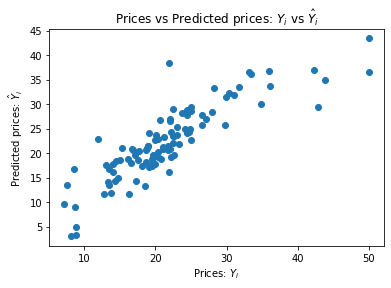

In [11]:
plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

The ideal scatter should be a straigt line in angle of 45'

## Ex 3

In [12]:
from sklearn.metrics import mean_squared_error 

In [13]:
mean_squared_error(y_test, Y_pred)

17.62920699122006

## Ex4

In [14]:
reg.score(X_train, y_train)

0.7379970143518502

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler().fit(bos)

In [17]:
bos_std = scaler.transform(bos)

In [18]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)

In [19]:
bos_std = polynomial_features.fit_transform(bos_std)

In [20]:
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(bos_std, boston.target, test_size=.2, random_state=7534)

In [21]:
print(bos_std.shape[0])
print(float(X_train_std.shape[0]) / float(bos_std.shape[0]))
print(float(X_test_std.shape[0]) / float(bos_std.shape[0]))

506
0.7984189723320159
0.2015810276679842


In [22]:
X_train_std.shape

(404, 105)

In [23]:
X_test_std.shape

(102, 105)

In [24]:
reg_std = LinearRegression().fit(X_train_std, y_train_std)

In [25]:
Y_pred_std = reg_std.predict(X_test_std)

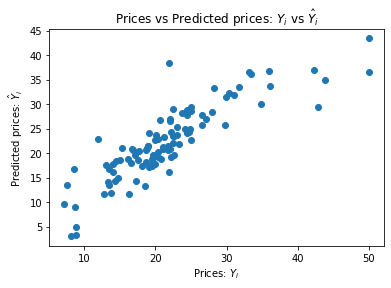

In [26]:
plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [27]:
mean_squared_error(y_test_std, Y_pred_std)

11.449921341690365

In [28]:
reg_std.score(X_train_std, y_train_std)

0.9323188560512323

## Ex 5

In [29]:
from sklearn.linear_model import Ridge, Lasso

In [30]:
lasso = Lasso(alpha=1)
lasso.fit(X_train_std, y_train_std)

Lasso(alpha=1)

In [31]:
lasso.score(X_train_std, y_train_std)

0.7771343417478858

In [32]:
lasso.score(X_test_std, y_test_std)

0.7150050298968508

In [33]:
import numpy as np

In [34]:
alpha = np.logspace(-2, 2, 100)
train = []
test = []
for a in alpha:
    lasso = Lasso(a)
    lasso.fit(X_train_std, y_train_std)
    train.append(lasso.score(X_train_std, y_train_std))
    test.append(lasso.score(X_test_std, y_test_std))

/home/artur/Documents/agh/sem_II/ml/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.04474064256965, tolerance: 3.5685750594059416
  positive)
/home/artur/Documents/agh/sem_II/ml/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.628562754066479, tolerance: 3.5685750594059416
  positive)
/home/artur/Documents/agh/sem_II/ml/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.573817387692543, tolerance: 3.5685750594059416
  positive)
/home/artur/Documents/agh/sem_II/ml/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: Conv

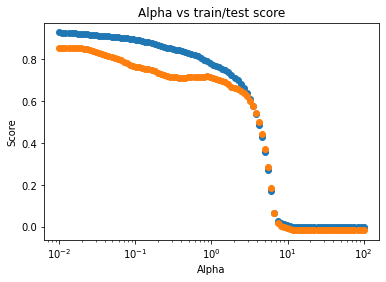

In [35]:
plt.scatter(alpha, train)
plt.scatter(alpha, test)
plt.xlabel("Alpha")
plt.xscale("log")
plt.ylabel("Score")
plt.title("Alpha vs train/test score")
plt.show()

In [36]:
ridge = Ridge(alpha=1)
ridge.fit(X_train_std, y_train_std)

Ridge(alpha=1)

In [37]:
ridge.score(X_train_std, y_train_std)

0.930465255231054

In [38]:
ridge.score(X_test_std, y_test_std)

0.8405797190049221

In [39]:
alpha = np.logspace(-3, 6, 100)
train = []
test = []
for a in alpha:
    ridge = Ridge(a)
    ridge.fit(X_train_std, y_train_std)
    train.append(ridge.score(X_train_std, y_train_std))
    test.append(ridge.score(X_test_std, y_test_std))

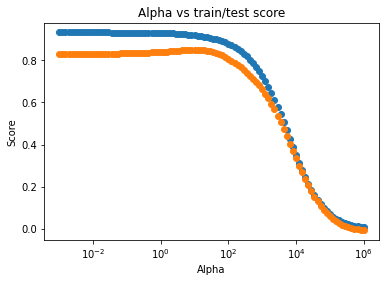

In [40]:
plt.scatter(alpha, train)
plt.scatter(alpha, test)
plt.xlabel("Alpha")
plt.xscale("log")
plt.ylabel("Score")
plt.title("Alpha vs train/test score")
plt.show()

# Regularization for logistic regression

In [41]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

## Ex 1

In [42]:
breast = pd.DataFrame(data.data)

In [43]:
breast.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

## Ex 2

In [44]:
del breast[0]

In [45]:
breast = StandardScaler().fit_transform(breast)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(breast, data.target, test_size=.2, random_state=7534)

## Ex 3

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
logReg = LogisticRegression(C=1, penalty='l1', solver='saga').fit(X_train, y_train)

/home/artur/Documents/agh/sem_II/ml/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


## Ex 4

In [49]:
alpha = np.logspace(-4, 0, 10)
accuracy = []
for a in alpha:
    accuracy.append(LogisticRegression(C=a, penalty='l2', solver='saga').fit(X_train, y_train).score(X_test, y_test))

/home/artur/Documents/agh/sem_II/ml/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/artur/Documents/agh/sem_II/ml/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/artur/Documents/agh/sem_II/ml/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


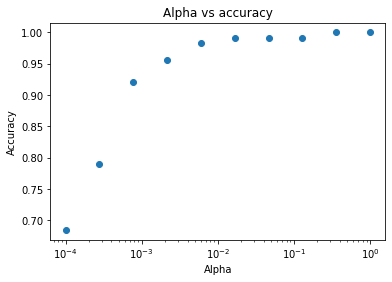

In [50]:
plt.scatter(alpha, accuracy)
plt.xlabel("Alpha")
plt.xscale("log")
plt.ylabel("Accuracy")
plt.title("Alpha vs accuracy")
plt.show()

# Regularization for kNN method

In [51]:
def kNN(k, features, labels, newPoint):
    dist_label = []
    for feat,label in zip(features, labels):
        dist_label.append([distance.euclidean(feat, newPoint), label])
    dist_label = sorted(dist_label)
    label_sorted = []
    for i in dist_label:
        label_sorted.append(i[1])
    response = mode(label_sorted[:k])
    if len(response.mode) > 1:
        return kNN(k+1, features, labels, newPoint)
    return int(response.mode)

In [52]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from scipy.spatial import distance
from scipy.stats import mode

In [53]:
db_iris = datasets.load_iris()
 
#Podziel zbiór na uczący i testowy, test_size - procentowy udział (przykład 50 % uczący i testowy)
features_train, features_test, labels_train, labels_test = train_test_split(db_iris.data, db_iris.target, test_size=0.5, random_state=7534)

In [54]:
k = np.linspace(1, 20, 20)

In [55]:
k = [int(j) for j in k]

In [56]:
accuracy = []
for _k in k:
    predictions = []
    for i in range(len(features_test)):
        predictions.append(kNN(_k, features_train, labels_train, features_test[i]))
    accuracy.append(accuracy_score(labels_test, predictions))

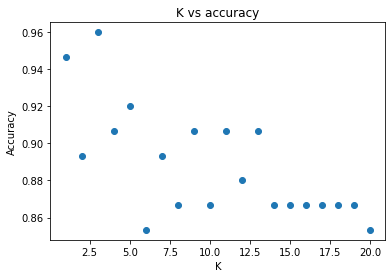

In [57]:
plt.scatter(k, accuracy)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("K vs accuracy")
plt.show()

In [58]:
k[accuracy.index(max(accuracy))]

3

Best accuracy k = 3

# Decistion trees optimalization

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

In [60]:
dane = loadmat('mnist.mat')

In [61]:
X = dane['X']
y = dane['y']

In [62]:
for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])
y[np.where(y==10)]=0

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7535)

In [64]:
depth = np.linspace(1, 20, 20)

In [65]:
accuracy = []
for dep in depth:
    accuracy.append(tree.DecisionTreeClassifier(max_depth=dep).fit(X_train, y_train).score(X_test, y_test))

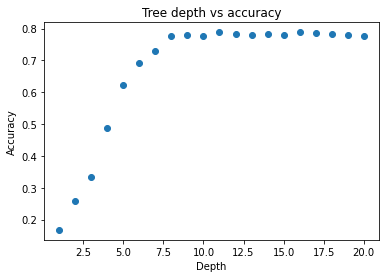

In [66]:
plt.scatter(depth, accuracy)
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.title("Tree depth vs accuracy")
plt.show()

In [67]:
depth[accuracy.index(max(accuracy))]

11.0

Best score: depth = 11